In [10]:
import pandas as pd

In [11]:
# Reading the CSV file 

df=pd.read_csv("C:\\Users\\Vignesh\\Desktop\\used_cars.csv")

In [12]:
# Getting information from the file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  Unnamed:

In [23]:
# Corelation

dfc=df.corr()
print(dfc)

                             id      year     miles  city_mileage  \
id                     1.000000  0.314289 -0.140389     -0.274989   
year                   0.314289  1.000000 -0.570330     -0.081093   
miles                 -0.140389 -0.570330  1.000000      0.109841   
city_mileage          -0.274989 -0.081093  0.109841      1.000000   
highway_mileage       -0.213916 -0.165681  0.122973      0.852120   
horsepower             0.251407  0.251688 -0.072269     -0.493823   
torque                 0.217796  0.322014 -0.207391     -0.519817   
engine_capacity_litre  0.033168  0.076018 -0.051521     -0.517143   
fuel_capacity          0.245833  0.274241 -0.130851     -0.754301   
num_cylinder          -0.049330  0.033104  0.026134     -0.286206   
num_owners            -0.476279 -0.431124  0.415837      0.107537   
price                 -0.003663  0.581254 -0.500769      0.131767   
wheel_drive           -0.106434  0.276995 -0.033973     -0.295957   
speed_levels           0.187717  0

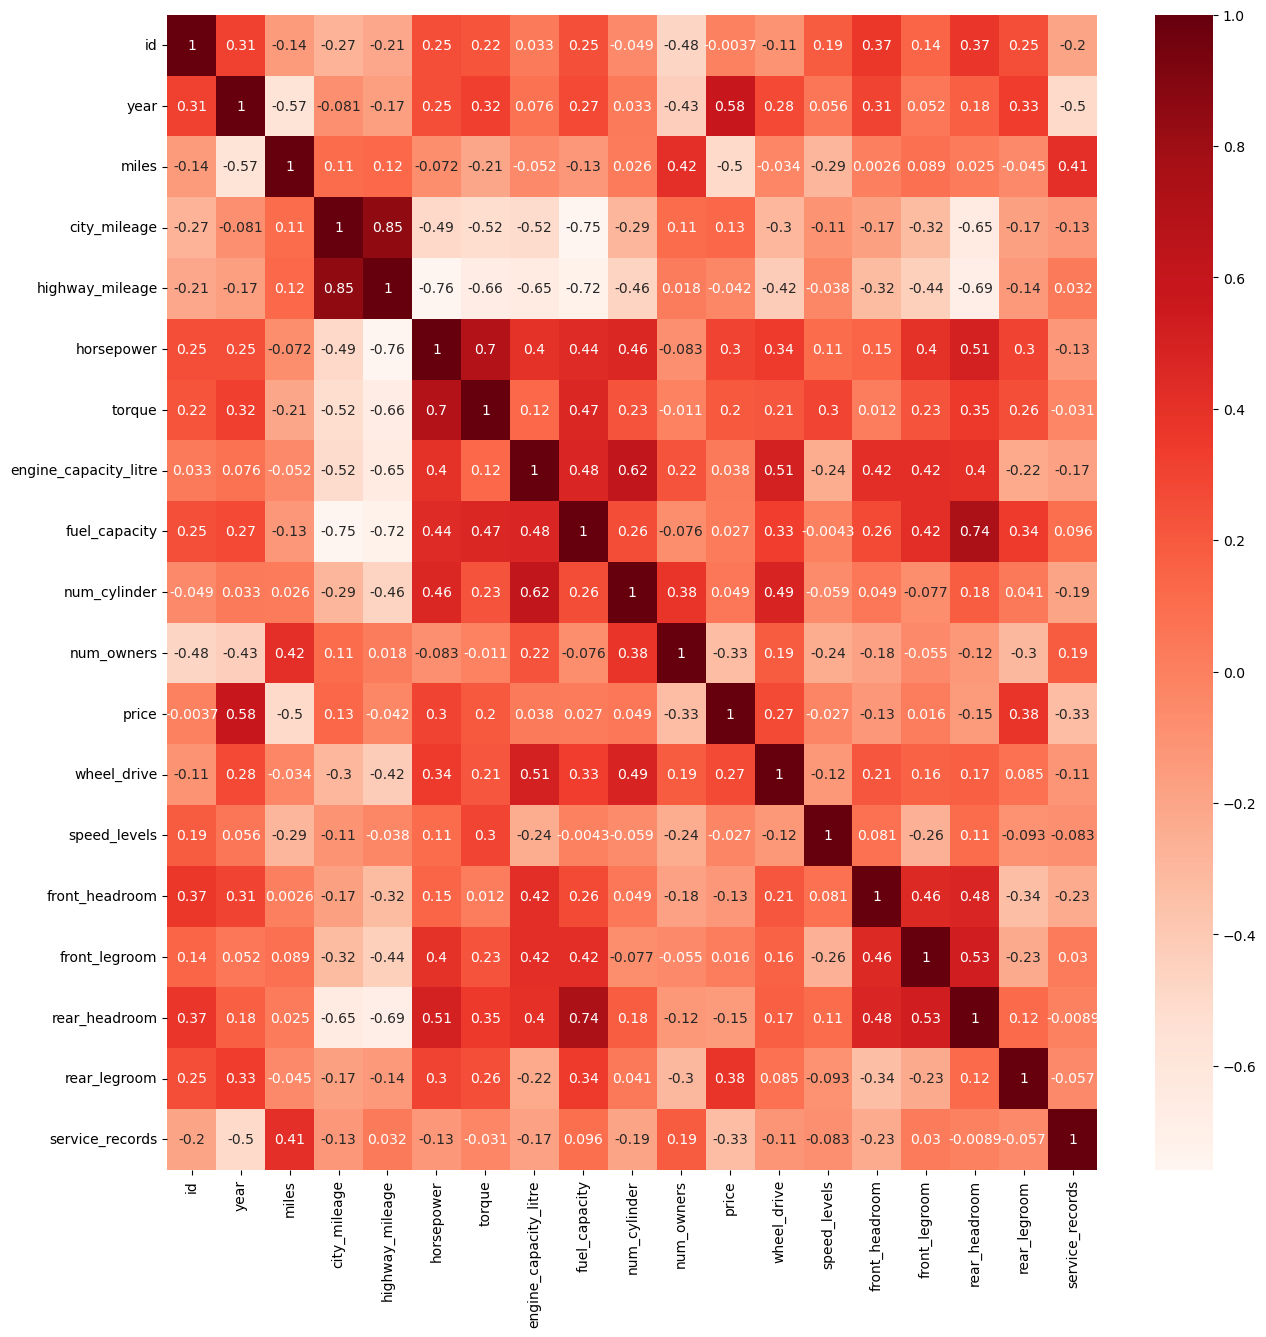

In [24]:
from matplotlib import pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,15))
sb.heatmap(dfc, cmap="Reds", annot=True)
plt.show()


In [26]:
# Dropping the columns from the dataset

df=df.drop(['id','num_cylinder','wheel_drive', 'speed_levels', 'front_headroom', 'front_legroom',
       'rear_headroom', 'rear_legroom', 'service_records'],axis=1)

In [27]:
df.columns

Index(['brand', 'model', 'year', 'miles', 'city_mileage', 'highway_mileage',
       'horsepower', 'torque', 'engine_capacity_litre', 'fuel_capacity',
       'num_owners', 'price', 'type', 'engine_type'],
      dtype='object')

In [28]:
# Introducing the new column into the dataset

df["Current Year"]=2023
df.head(1)

,brand,model,year,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,price,type,engine_type,Current Year
0,Chevrolet,Volt LT,2019,27173,43,42,149,294,1.5,8.9,3,25655,sedan,hybrid_gas_electric,2023


In [29]:
df["Year"]=df['Current Year']-df["year"]
df=df.drop(['year','Current Year'],axis=1)
df.head(1)

,brand,model,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,price,type,engine_type,Year
0,Chevrolet,Volt LT,27173,43,42,149,294,1.5,8.9,3,25655,sedan,hybrid_gas_electric,4


In [30]:
dummies=pd.get_dummies(df.brand)
dummies.head(1)

,Chevrolet,Ford,Honda,Hyundai,Subaru,Volkswagen
0,1,0,0,0,0,0


In [31]:
df=pd.concat([df,dummies],axis=1)
df.head(2)

,brand,model,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,price,type,engine_type,Year,Chevrolet,Ford,Honda,Hyundai,Subaru,Volkswagen
0,Chevrolet,Volt LT,27173,43,42,149,294,1.5,8.9,3,25655,sedan,hybrid_gas_electric,4,1,0,0,0,0,0
1,Hyundai,Elantra SE,76941,29,38,146,132,2.0,14.0,2,15590,sedan,gas,6,0,0,0,1,0,0


In [32]:
dummies_1=pd.get_dummies(df.model)
dummies_1.head(2)

,Accord,Civic,Clarity,Elantra SE,Focus,Fusion,Impreza,Insight,Jetta,Legacy,Malibu,Passat,Sonata,Taurus,Volt LT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Merging the column into the dataset

df=pd.concat([df,dummies_1],axis=1)
df.head(2)

,brand,model,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,...,Fusion,Impreza,Insight,Jetta,Legacy,Malibu,Passat,Sonata,Taurus,Volt LT
0,Chevrolet,Volt LT,27173,43,42,149,294,1.5,8.9,3,...,0,0,0,0,0,0,0,0,0,1
1,Hyundai,Elantra SE,76941,29,38,146,132,2.0,14.0,2,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dummies_2=pd.get_dummies(df.engine_type)
dummies_2.head(2)

,gas,hybrid_gas_electric
0,0,1
1,1,0


In [35]:
df=pd.concat([df,dummies_2],axis=1)
df.head(2)

,brand,model,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,...,Insight,Jetta,Legacy,Malibu,Passat,Sonata,Taurus,Volt LT,gas,hybrid_gas_electric
0,Chevrolet,Volt LT,27173,43,42,149,294,1.5,8.9,3,...,0,0,0,0,0,0,0,1,0,1
1,Hyundai,Elantra SE,76941,29,38,146,132,2.0,14.0,2,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# Selecting the dependent variable

y=df['price']
y.head(5)

0    25655
1    15590
2    13590
3    20590
4    16787
Name: price, dtype: int64

In [41]:
x=df.drop(['brand', 'model','price','engine_type','type'],axis=1)
x.head(2)

,miles,city_mileage,highway_mileage,horsepower,torque,engine_capacity_litre,fuel_capacity,num_owners,Year,Chevrolet,...,Insight,Jetta,Legacy,Malibu,Passat,Sonata,Taurus,Volt LT,gas,hybrid_gas_electric
0,27173,43,42,149,294,1.5,8.9,3,4,1,...,0,0,0,0,0,0,0,1,0,1
1,76941,29,38,146,132,2.0,14.0,2,6,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
x.columns

Index(['miles', 'city_mileage', 'highway_mileage', 'horsepower', 'torque',
       'engine_capacity_litre', 'fuel_capacity', 'num_owners', 'Year',
       'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Subaru', 'Volkswagen',
       'Accord', 'Civic', 'Clarity', 'Elantra SE', 'Focus', 'Fusion',
       'Impreza', 'Insight', 'Jetta', 'Legacy', 'Malibu', 'Passat', 'Sonata',
       'Taurus', 'Volt LT', 'gas', 'hybrid_gas_electric'],
      dtype='object')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [45]:
# Train_Test_Split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [58]:
model=RandomForestClassifier( n_estimators=100, criterion='gini')
model.fit(x,y)

RandomForestClassifier()

In [59]:
y_predict=model.predict(x_test)

MSE=mean_squared_error(y_test,y_predict)

MAE=mean_absolute_error(y_test,y_predict)

R2=r2_score(y_test,r_predict)

print('Mean_Sqaured_Error: ',MSE)
print('R2_Score: ',R2)
print("Mean_Absolute_Error: ",MAE)

Mean_Sqaured_Error:  0.0
R2_Score:  1.0
Mean_Absolute_Error:  0.0
